# Intro to reimbursements: overview with visualization

This notebook provides an overview of the `2017-03-15-reimbursements.xz` dataset, which contains broad data regarding CEAP usage in all terms since 2007. It aims to provide an example of basic analyses and visualization by answering questions such as:

- In which period of the year more reimbursements were issued?
- Which party spends more, in average, overall?
    - And in Santa Catarina?
- Which congressman spent more in 2015 term?
- Which are the top service suppliers?
- Which is the most expensive single reimbursement?

---

The notebook is divided as follows:

** 1. General description **

Sections containing basic information for readers get the dataset context.

** 2. Questions & answers **

Data manipulation to answer questions as those listed above.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import rcParams

%matplotlib inline

# Charts styling
plt.style.use('ggplot')
rcParams['figure.figsize'] = 15, 8
matplotlib.rcParams.update({'font.size': 14})
#rcParams['font.family'] = 'Georgia'

# Type setting for specific columns
DTYPE = dict(cnpj=np.str, cnpj_cpf=np.str, ano=np.int16, term=np.str)

In [ ]:
t = pd.read_csv('../data/2017-03-15-reimbursements.xz', dtype=DTYPE, low_memory=False)
t.info(memory_usage='deep')

In [ ]:
t.columns

In [ ]:
t.installments.unique()

In [ ]:
d = dict()
for c in t.columns:
    print(c, len(t[c].unique()))
    d[c] = len(t[c].unique())

In [ ]:
s = pd.Series(d)
s.sort_values()

In [2]:
DTYPE_low_memory = dict(cnpj_cpf=np.str,\
                        installment='category',\
                        term_id='category',\
                        term='category',\
                        document_type='category',\
                        subquota_group_id='category',\
                        subquota_group_description='category',\
                        #subquota_description='category',\
                        subquota_number='category',\
                        state='category',\
                        party='category')

reimbursements_low = pd.read_csv('../data/2017-03-15-reimbursements.xz', dtype=DTYPE_low_memory, low_memory=False, parse_dates=['issue_date'])
reimbursements_low.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1580942 entries, 0 to 1580941
Data columns (total 31 columns):
year                          1580942 non-null int64
applicant_id                  1580942 non-null int64
document_id                   1580942 non-null int64
reimbursement_value_total     0 non-null float64
total_net_value               1580942 non-null float64
reimbursement_numbers         1580942 non-null object
congressperson_name           1580942 non-null object
congressperson_id             1578043 non-null float64
congressperson_document       1578043 non-null float64
term                          1580942 non-null category
state                         1578043 non-null category
party                         1578043 non-null category
term_id                       1578043 non-null category
subquota_number               1580942 non-null category
subquota_description          1580942 non-null object
subquota_group_id             1580942 non-null category
subquota_group_d

In [ ]:
DTYPE_low_memory = dict(cnpj=np.str,\
                        ano=np.int16,\
                        subquota_description='category',\
                        subquota_number='category',\
                        subquota_group_description='category',\
                        subquota_group_id='category',\
                        party='category',\
                        document_type='category',\
                        congressperson_id='category',\
                        congressperson_name=np.str,\
                        congressperson_document=np.str,\
                        cnpj_cpf='category',\
                        term='category',\
                        term_id='category',\
                        state='category',\
                        reimbursement_numbers=np.str,\
                        document_number='category',\
                        batch_number='category',\
                        leg_of_the_trip='category',\
                        passenger=np.str,\
                        supplier=np.str)

reimbursements_low = pd.read_csv('../data/2017-03-15-reimbursements.xz', dtype=DTYPE_low_memory, low_memory=False, parse_dates=['issue_date'])
reimbursements_low.info(memory_usage='deep')

In [ ]:
#len(reimbursements_low.issue_date.unique())

In [ ]:
#reimbursements.columns

In [ ]:
#reimbursements.party.unique()

In [3]:
# Creates a DataFrame copy with fewer columns
rb = reimbursements_low[['year', 'month', 'total_net_value', 'party', 'state', 'term', 'issue_date',\
        'congressperson_name', 'subquota_description','supplier', 'cnpj_cpf']]
rb.head()

,year,month,total_net_value,party,state,term,issue_date,congressperson_name,subquota_description,supplier,cnpj_cpf
0,2009,4,130.00,PP,PR,2015.0,2009-04-06 00:00:00.0,DILCEU SPERAFICO,Fuels and lubricants,MELHOR POSTO DE COMBUSTÍVEIS LTDA,02989654001197
1,2009,4,135.00,PP,PR,2015.0,2009-04-07 00:00:00.0,DILCEU SPERAFICO,"Locomotion, meal and lodging",MELONGENA PARTICIPAÇÕES LTDA,09259358000450
2,2009,3,1000.00,PP,PR,2015.0,2009-03-12 00:00:00.0,DILCEU SPERAFICO,Maintenance of office supporting parliamentary...,ARY ANTONIO MOSCHETTA,01537369920
3,2009,4,170.00,PP,PR,2015.0,2009-04-14 00:00:00.0,DILCEU SPERAFICO,Fuels and lubricants,CONVER COMBUSTÍVEIS AUTOMÓVEIS LTDA,00038505000579
4,2009,4,100.11,PP,PR,2015.0,2009-04-09 00:00:00.0,DILCEU SPERAFICO,Fuels and lubricants,GRANDO E GROFF LTDA,00161576000211


## 1. General description

### Consider only 2015 term from now on

In [4]:
# Creates a DataFrame copy for the 2015 term
rb_2015_term = rb[rb.term == '2015.0']

### How many congressmen?

In [5]:
congressmen_qty = len(rb_2015_term.congressperson_name.unique())
congressmen_qty

592

### Total reimbursed in 2015 term (in millions)

In [6]:
total_reimbursements = rb_2015_term.total_net_value.sum()
total_reimbursements / 1e6

698.27068846999987

## 2. Questions & answers

### In which period of the year more reimbursements were issued?

In [7]:
rb_2015_term.head()

,year,month,total_net_value,party,state,term,issue_date,congressperson_name,subquota_description,supplier,cnpj_cpf
0,2009,4,130.00,PP,PR,2015.0,2009-04-06 00:00:00.0,DILCEU SPERAFICO,Fuels and lubricants,MELHOR POSTO DE COMBUSTÍVEIS LTDA,02989654001197
1,2009,4,135.00,PP,PR,2015.0,2009-04-07 00:00:00.0,DILCEU SPERAFICO,"Locomotion, meal and lodging",MELONGENA PARTICIPAÇÕES LTDA,09259358000450
2,2009,3,1000.00,PP,PR,2015.0,2009-03-12 00:00:00.0,DILCEU SPERAFICO,Maintenance of office supporting parliamentary...,ARY ANTONIO MOSCHETTA,01537369920
3,2009,4,170.00,PP,PR,2015.0,2009-04-14 00:00:00.0,DILCEU SPERAFICO,Fuels and lubricants,CONVER COMBUSTÍVEIS AUTOMÓVEIS LTDA,00038505000579
4,2009,4,100.11,PP,PR,2015.0,2009-04-09 00:00:00.0,DILCEU SPERAFICO,Fuels and lubricants,GRANDO E GROFF LTDA,00161576000211


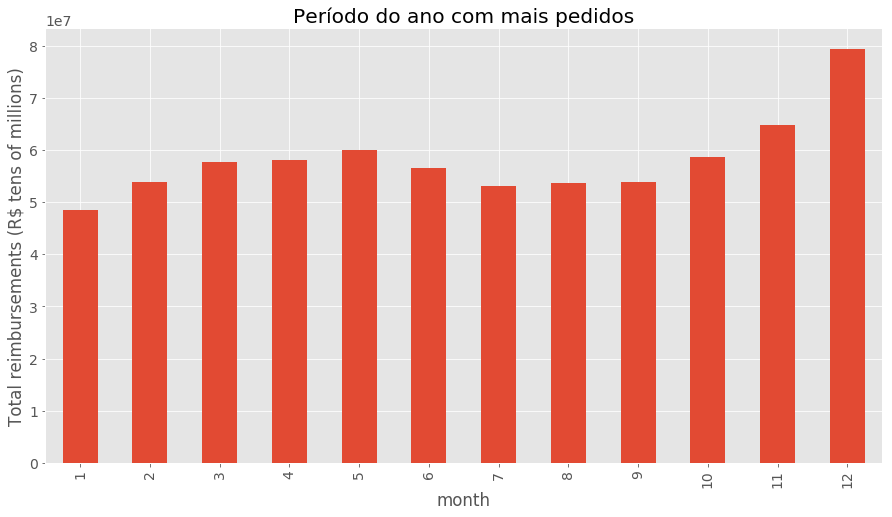

In [8]:
rb_2015_term.groupby('month')\
    .sum()\
    .total_net_value\
    .plot(kind='bar')
    
plt.title('Período do ano com mais pedidos')
plt.ylabel('Total reimbursements (R$ tens of millions)')

### Which party spends more, in average?

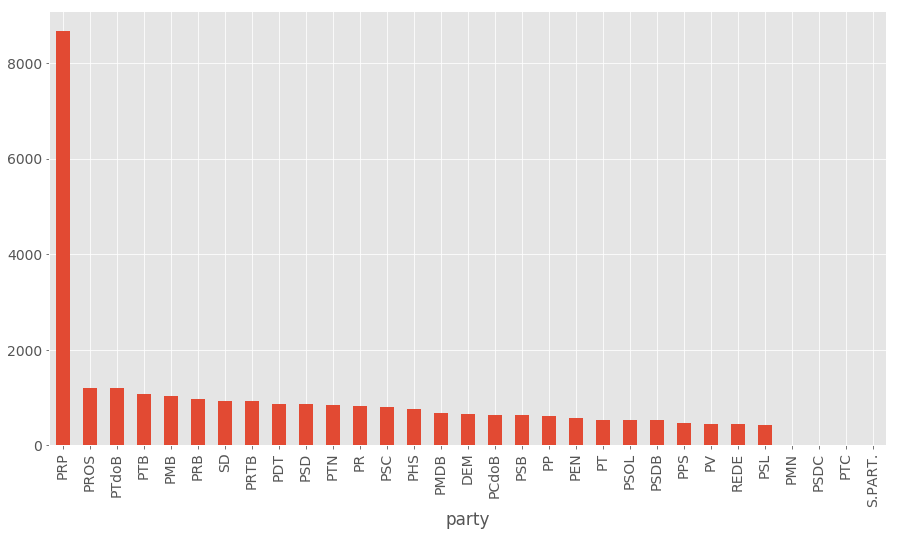

In [9]:
rb_2015_term.groupby('party')\
    .mean()\
    .total_net_value\
    .sort_values(ascending=False)\
    .plot(kind='bar')

### Which party spends more, in average, in Santa Catarina?

In [10]:
# Creates a DataFrame copy filtering only entries in the state (SC)
sc = rb_2015_term[rb_2015_term.state == 'SC']
sc.head()

,year,month,total_net_value,party,state,term,issue_date,congressperson_name,subquota_description,supplier,cnpj_cpf
1241,2009,3,500.0,PMDB,SC,2015.0,2009-03-31 00:00:00.0,EDINHO BEZ,Maintenance of office supporting parliamentary...,JOSÉ RESENDE,17969131972
1242,2009,3,50.0,PMDB,SC,2015.0,2009-03-30 00:00:00.0,EDINHO BEZ,Fuels and lubricants,CALL TECH,01357769000124
1243,2009,3,50.0,PMDB,SC,2015.0,2009-03-24 00:00:00.0,EDINHO BEZ,Fuels and lubricants,AUTO POSTO IMPERIAL,00814083000152
1244,2009,4,50.0,PMDB,SC,2015.0,2009-04-01 00:00:00.0,EDINHO BEZ,Fuels and lubricants,CAL COMBUSTÍVEIS AUTOMOTIVOS LTDA,00373589000505
1245,2009,2,701.5,PMDB,SC,2015.0,2009-02-05 00:00:00.0,EDINHO BEZ,Maintenance of office supporting parliamentary...,EDIFICIO PIRAMIDE - RENATA MENDES BRITO - BROG...,71169652972


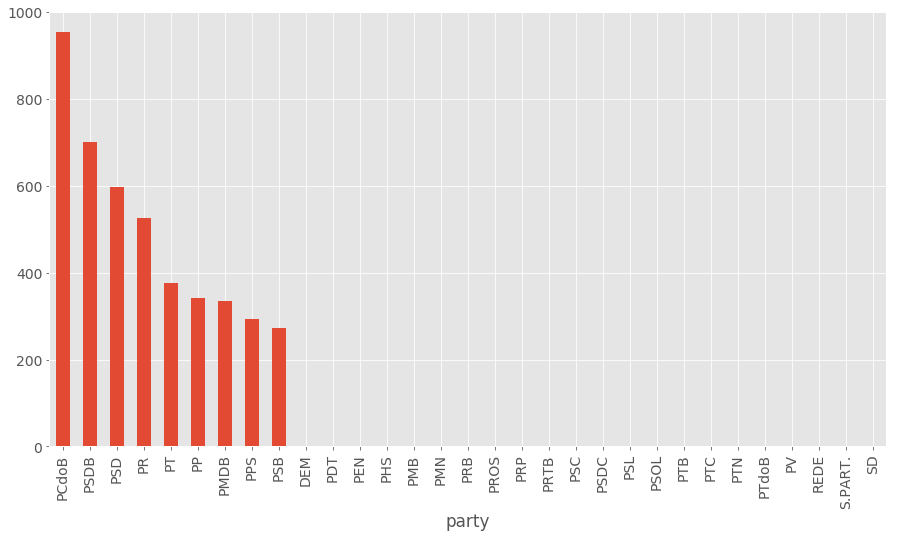

In [11]:
sc.groupby('party')\
    .mean()\
    .total_net_value\
    .sort_values(ascending=False)\
    .plot(kind='bar')

### Which congressmen spent more in 2015 term?

In [12]:
rb_2015_term.groupby('congressperson_name')\
    .sum()\
    .total_net_value\
    .sort_values(ascending=False)\
    .head(10)

congressperson_name
WELLINGTON ROBERTO         3004465.11
CLEBER VERDE               2895861.67
RAIMUNDO GOMES DE MATOS    2777134.46
EFRAIM FILHO               2740068.65
GORETE PEREIRA             2682520.94
RENATO MOLLING             2675980.13
SILAS CÂMARA               2616348.57
DÉCIO LIMA                 2596289.87
NELSON MEURER              2565541.34
HERMES PARCIANELLO         2544743.67
Name: total_net_value, dtype: float64

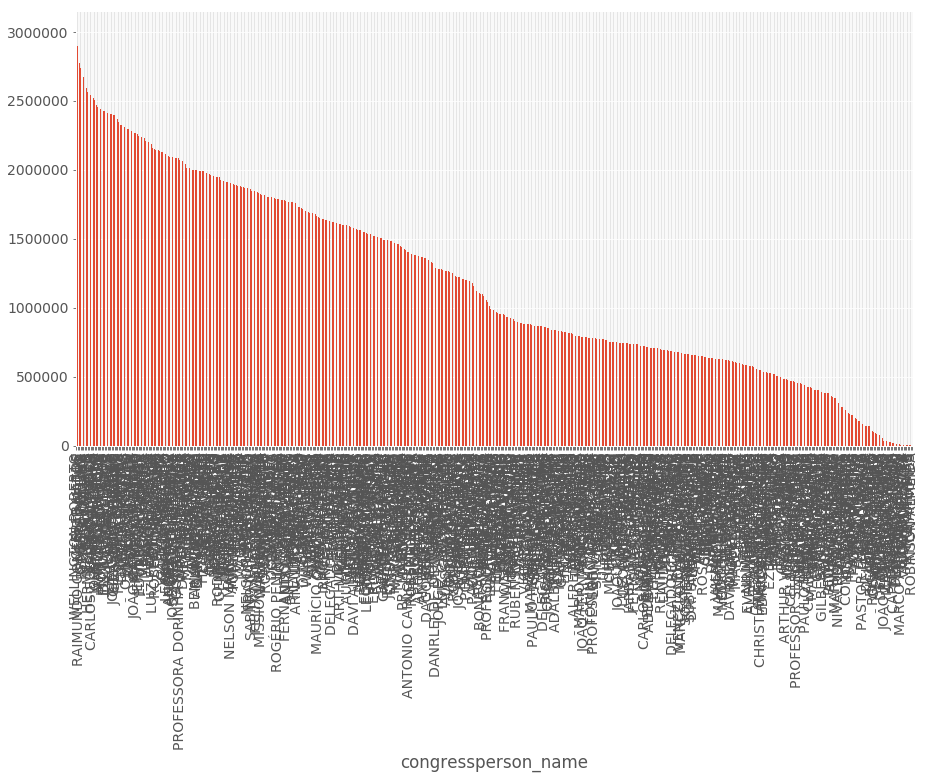

In [13]:
rb_2015_term.groupby('congressperson_name')\
    .sum()\
    .total_net_value\
    .sort_values(ascending=False)\
    .plot(kind='bar')

### How much was spent with each supplier?

In [14]:
rb_2015_term.groupby(['cnpj_cpf', 'supplier', 'subquota_description'])\
    .sum()\
    .sort_values(by='total_net_value', ascending=False)\
    .head(20)

year  \
cnpj_cpf       supplier                                subquota_description                                 
22005529000130 DOUGLAS CUNHA DA SILVA ME               Consultancy, research and technical work    393064   
15193908000136 JOSELY FERNANDA DO NASCIMENTO           Publicity of parliamentary activity         727434   
13230334000101 InCine Video Ltda - ME                  Publicity of parliamentary activity         737736   
33000118000179 TELEMAR NORTE LESTE S/A                 Telecommunication                         12043578   
04206050005140 TIM                                     Telecommunication                          4250572   
02558157000162 TELEFONICA BRASIL S.A.                  Telecommunication                          4554723   
               TELEFÔNICA BRASIL S.A.                  Telecommunication                          3956740   
05443449000148 Vértice Associados                      Consultancy, research and technical work    251924   
11130989000174 UNIGEST PROPAGANDA LTDA                 Publicity of parliamentary activity          44311   
17589509000114 FATIMA FERREIRA DOS SANTOS ME           Publicity of parliamentary activity         151083   
26198515000484 SEMPRE EDITORA LTDA.                    Publicity of parliamentary activity         308255   
00539486000130 STILO GRAFICA E EDITORA LTDA            Publicity of parliamentary activity          46333   
04206050005140 TIM CELULAR S/A                         Telecommunication                          4273591   
02570474000102 WULFERT DE OLIVEIRA & CIA LTDA          Automotive vehicle renting or charter       364770   
06090891000109 PAMPULHA EDITORA GRÁFICA LTDA           Publicity of parliamentary activity         154901   
02610235000120 DMD GESTÃO ADM. LTDA                    Consultancy, research and technical work    133041   
09230540000136 MATHEUS & MENDES SOCIEDADE DE ADVOGADOS Consultancy, research and technical work    108704   
21793072000103 CARVALHO & CARDOSO ADVOGADOS ASSOCIADOS Consultancy, research and technical work    171315   
38024675000143 QUASAR LOCADORA DE VEÍCULOS LTDA        Automotive vehicle renting or charter       731523   
02012862000160 TAM LINHAS AÉREAS.                      Flight tickets                             2025059   

                                                                                                 month  \
cnpj_cpf       supplier                                subquota_description                              
22005529000130 DOUGLAS CUNHA DA SILVA ME               Consultancy, research and technical work   1338   
15193908000136 JOSELY FERNANDA DO NASCIMENTO           Publicity of parliamentary activity        2467   
13230334000101 InCine Video Ltda - ME                  Publicity of parliamentary activity        2427   
33000118000179 TELEMAR NORTE LESTE S/A                 Telecommunication                         39638   
04206050005140 TIM                                     Telecommunication                         13747   
02558157000162 TELEFONICA BRASIL S.A.                  Telecommunication                         14634   
               TELEFÔNICA BRASIL S.A.                  Telecommunication                          8840   
05443449000148 Vértice Associados                      Consultancy, research and technical work    871   
11130989000174 UNIGEST PROPAGANDA LTDA                 Publicity of parliamentary activity         180   
17589509000114 FATIMA FERREIRA DOS SANTOS ME           Publicity of parliamentary activity         491   
26198515000484 SEMPRE EDITORA LTDA.                    Publicity of parliamentary activity        1013   
00539486000130 STILO GRAFICA E EDITORA LTDA            Publicity of parliamentary activity         181   
04206050005140 TIM CELULAR S/A                         Telecommunication                         14603   
02570474000102 WULFERT DE OLIVEIRA & CIA LTDA          Automotive vehicle renting or charter      1183   
060908

### Services provided by most paid single supplier

In [15]:
rb_2015_term.groupby(['supplier', 'cnpj_cpf', 'subquota_description', 'year', 'congressperson_name'])\
    .sum()\
    .sort_values(by='total_net_value', ascending=False)\
    .loc['DOUGLAS CUNHA DA SILVA ME']\
    .total_net_value

cnpj_cpf        subquota_description                      year  congressperson_name
22005529000130  Consultancy, research and technical work  2016  SÉRGIO BRITO           233122.63
                                                                ROBERTO SALES          216000.00
                                                                MARCELO AGUIAR         190000.00
                                                                MAIA FILHO             180000.03
                                                                VINICIUS CARVALHO      180000.00
                                                          2015  MARCELO AGUIAR         150000.00
                                                                VINICIUS CARVALHO      139000.00
                                                                ROBERTO SALES          136800.00
                                                          2016  ALBERTO FILHO          127473.58
                                           

### Which is the most expensive individual reimbursement?

In [16]:
rb = rb.sort_values(by='total_net_value', ascending=False)
rb.head()

,year,month,total_net_value,party,state,term,issue_date,congressperson_name,subquota_description,supplier,cnpj_cpf
773814,2012,12,215000.0,PTB,SP,2015.0,2012-12-14 00:00:00.0,ARNALDO FARIA DE SÁ,Publicity of parliamentary activity,BALCOLOR DIGITAL ATELIER GRAFICO LTDA,05511195000158
1141267,2014,12,208320.0,PTB,SP,2015.0,2014-12-19 00:00:00.0,ARNALDO FARIA DE SÁ,Publicity of parliamentary activity,GRÁFICA TRÊS PONTAS,54450705000130
969178,2013,12,197370.0,PTB,SP,2015.0,2013-12-27 00:00:00.0,ARNALDO FARIA DE SÁ,Publicity of parliamentary activity,BALCOLOR DIGITAL ATELIER GRAFICO LTDA,05511195000158
573671,2011,12,197000.0,PTB,SP,2015.0,2011-12-19 00:00:00.0,ARNALDO FARIA DE SÁ,Publicity of parliamentary activity,BALCOLOR,05511195000158
588639,2011,12,194100.0,PT,SP,2015.0,2011-12-26 00:00:00.0,ARLINDO CHINAGLIA,Publicity of parliamentary activity,ALL WIN PROPAGANDA LTDA,09023310000104
